<a href="https://colab.research.google.com/github/dwhew/data_science/blob/main/weather.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

What is the nicest city to live in?

Notes
*   warmest?
*   least rain?
*   has snow?
*   score based on all attributes would be the most objective (maybe number of days could be a good counter and then rank/sort. must prioritise attributes)






In [108]:
import pandas as pd


# experimenting with data

In [109]:
inndf = pd.read_csv(r"https://raw.githubusercontent.com/ds4geo/ds4geo/master/data/timeseries/meteo/Innsbruck_weather_2015-19.csv")
inndf.head()

,date,mean_temp (deg C),min_temp (deg C),max_temp (deg C),mean_pressure (mb),mean_humidity (%),mean_wind (ms-1),precip_sum (mm),month,month-year,year
0,2015-01-01,-3.137500,-7.4,1.0,724.241667,92.458333,1.166667,0.0,Jan,Jan-2015,2015
1,2015-01-02,-3.341667,-9.2,1.5,721.975000,94.875000,1.125000,1.6,Jan,Jan-2015,2015
2,2015-01-03,1.458333,0.4,3.2,717.537500,96.833333,1.791667,13.1,Jan,Jan-2015,2015
3,2015-01-04,2.108333,-0.2,4.6,717.608333,79.291667,3.041667,25.9,Jan,Jan-2015,2015
4,2015-01-05,-0.841667,-5.3,2.4,721.662500,74.875000,2.666667,0.3,Jan,Jan-2015,2015


In [110]:
len(inndf)

1826

In [111]:
inndf.dtypes

date                   object
mean_temp (deg C)     float64
min_temp (deg C)      float64
max_temp (deg C)      float64
mean_pressure (mb)    float64
mean_humidity (%)     float64
mean_wind (ms-1)      float64
precip_sum (mm)       float64
month                  object
month-year             object
year                    int64
dtype: object

In [131]:
inndf['year'].value_counts()

2016    366
2019    365
2018    365
2017    365
2015    365
Name: year, dtype: int64

In [126]:
#no. of days without rain (annual average)
inn_sun = len(inndf[inndf['precip_sum (mm)'] == 0.0]) /5
lon_sun = len(londf[londf['precip_sum (mm)'] == 0.0]) /5
print(lon_sun, inn_sun)

198.0 165.8


In [114]:
#get average day by month
inndf_months = inndf.groupby('month').mean()

#need to order months
month_ordered = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
inndf_months = inndf_months.reindex(month_ordered)
inndf_months

,mean_temp (deg C),min_temp (deg C),max_temp (deg C),mean_pressure (mb),mean_humidity (%),mean_wind (ms-1),precip_sum (mm),year
month,,,,,,,,
Jan,-1.036986,-4.572258,3.523226,710.995404,84.563344,2.028521,7.080000,2017.000000
Feb,1.459536,-2.696454,7.192199,710.668417,77.120303,2.071454,3.158865,2016.992908
Mar,6.061640,0.803871,12.434839,709.293662,69.261675,2.447647,4.507097,2017.000000
Apr,10.601215,4.645333,16.982667,710.002559,64.274459,2.805385,5.587333,2017.000000
May,14.001605,8.596129,20.202581,709.830970,69.726098,2.369585,10.334839,2017.000000
Jun,18.983879,13.187333,25.584000,711.072269,68.044504,2.257706,11.106667,2017.000000
Jul,19.910417,14.322581,26.470323,711.496566,70.569659,1.934507,11.485806,2017.000000
Aug,19.554905,13.970323,26.247097,712.556892,72.964836,2.022288,14.955484,2017.000000
Sep,14.570158,9.645333,20.586000,712.863897,76.828923,1.865618,9.295333,2017.000000


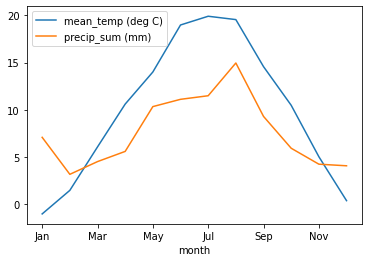

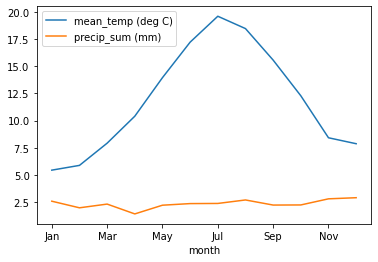

In [121]:
inndf_months.plot(y=['mean_temp (deg C)', 'precip_sum (mm)'])
londf_months.plot(y=['mean_temp (deg C)', 'precip_sum (mm)'])

more ideas on what to look into:


*   days of snow (need to look into conditions)
*   compare average temps (one graph)
*   days of rain
*   sort by priority. i.e. lowest rainfall, highest temp, lowest wind speed





#load other city data

In [119]:
londf = pd.read_csv(r"https://raw.githubusercontent.com/ds4geo/ds4geo/master/data/timeseries/meteo/London_weather_2015-19.csv")
londf_months = londf.groupby('month').mean().reindex(month_ordered)

In [120]:
inndf_months.compare(londf_months, keep_equal=True)

mean_temp (deg C)             ...         year             
                   self      other  ...         self        other
month                               ...                          
Jan           -1.036986   5.452045  ...  2017.000000  2017.000000
Feb            1.459536   5.888956  ...  2016.992908  2016.992908
Mar            6.061640   7.928891  ...  2017.000000  2017.066667
Apr           10.601215  10.405160  ...  2017.000000  2017.000000
May           14.001605  13.945328  ...  2017.000000  2017.000000
Jun           18.983879  17.205025  ...  2017.000000  2017.000000
Jul           19.910417  19.583573  ...  2017.000000  2017.000000
Aug           19.554905  18.449890  ...  2017.000000  2017.000000
Sep           14.570158  15.556601  ...  2017.000000  2017.000000
Oct           10.473568  12.279683  ...  2017.000000  2017.000000
Nov            5.024660   8.424954  ...  2017.000000  2017.000000
Dec            0.367959   7.878952  ...  2017.000000  2017.000000

[12 rows x 16 columns]